# Компьютерные игры 🕹️

**Описание проекта:** Интернет-магазин, который продаёт по всему миру компьютерные игры. Данный развивающийся бизнес хочет правильно спланировать рекламные кампании и точки роста.

**Цель проекта:** Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. 

**Ход исследования:**
- Подготовка данных: загрузка и изучение общей информации
- Предобработка данных: обработка пропущенных значений и дубликатов, корректировка типов данных, подсчет суммарных продаж по регионам
- Исследовательский анализ данных: анализ продаж по платформам, значимость отзывов в продажах
- Портрет пользователя регионов
- Проверка гипотез

**Содержание**<a id='toc0_'></a>    
  
1. [Подготовка данных](#toc1_)                                  
  1.1 [Установка библиотек](#toc1_1_)    
  1.2 [Загрузка данных и изучение общей информации](#toc1_2_) 
  
2. [Предобработка данных](#toc2_)         
  2.1 [Приведение названий столбцов к нижнему регистру](#toc2_1_)    
  2.2 [Преобразование данных в нужные типы](#toc2_2_)    
  2.3 [Замена пропусков](#toc2_3_)    
  2.4 [Подсчет суммарных продаж по всем регионам](#toc2_4_) 
  
3. [Исследовательский анализ данных (EDA)](#toc3_)    
  3.1 [Выпуск игр по годам](#toc3_1_)    
  3.2 [Продажи по платформам](#toc3_2_)     
  3.3 [Выбор среза данных для дальнейшего анализа](#toc3_3_)     
  3.4 [Платформы-лидеры по продажам](#toc3_4_)     
  3.5 [ Влияние отзывов пользователей и критиков на продажи игр в рамках самой популярной платформы PS4 ](#toc3_5_)     
  3.6 [Влияние отзывов пользователей и критиков на продажи игр на платформу XOne. Сравнение результатов ](#toc3_6_)     
  3.7 [Общее распределение игр по жанрам](#toc3_7_)     
  3.8 [Подытог исследовательского анализа](#toc3_8_)     
  
4. [Портрет пользователя каждого региона](#toc4_)     
  4.1 [Самые популярные платформы для пользователей отдельных регионов](#toc4_1_)     
  4.2 [Самые популярные жанры для пользователей отдельных регионов](#toc4_2_)     
  4.3 [Влияние рейтинга ESRB на продажи в отдельных регионах](#toc4_3_)     
  
5. [Проверка гипотез](#toc5_)     
  5.1 [ Средние пользовательские рейтинги платформ XOne и PC](#toc5_1_)     
  5.2 [Средние пользовательские рейтинги жанров Action и Sports](#toc5_2_)     
  
6. [Общий вывод](#toc6_)

## <a id='toc1_'></a>Подготовка данных[&#8593;](#toc0_)

### <a id='toc1_1_'></a>Установка библиотек      [&#8593;](#toc0_)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
from termcolor import colored

### <a id='toc1_2_'></a>Загрузка данных и изучение общей информации      [&#8593;](#toc0_)

In [2]:
data = pd.read_csv('/datasets/games.csv')

**Описание данных**

|Название|Описание|
|:--:|--|
|`Name`|название игры
|`Platform`|платформа
|`Year_of_Release`|год выпуска
|`Genre`|жанр игры
|`NA_sales`|продажи в Северной Америке (миллионы проданных копий)
|`EU_sales`|продажи в Европе (миллионы проданных копий)
|`JP_sales`|продажи в Японии (миллионы проданных копий)
|`Other_sales`|продажи в других странах (миллионы проданных копий)
|`Critic_Score`|оценка критиков (максимум 100)
|`User_Score`|оценка пользователей (максимум 10)
|`Rating`|рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## <a id='toc2_'></a>Предобработка данных  [&#8593;](#toc0_)

### <a id='toc2_1_'></a>Приведение названий столбцов к нижнему регистру  [&#8593;](#toc0_)

In [5]:
data.columns = [x.lower() for x in data.columns]

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### <a id='toc2_1_'></a>Преобразование данных в нужные типы  [&#8593;](#toc0_)

In [7]:
columns_to_replace_type_float = ['critic_score','na_sales','eu_sales','jp_sales','other_sales','user_score']
for column in columns_to_replace_type_float:
    try:
        data[column] = data[column].astype('float32')
    except:
        continue
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float32(5), float64(1), object(5)
memory usage: 1.1+ MB


In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN


Учитывая, что точности данных типа *float32* в данном датасете нам хватит, сэкономим место и время на совершение операций с помощью замены типов в соответствующих столбцах. 
В столбце *year_of_release* должен быть целочисленный тип данных, поэтому его исследуем в дальнейшем.
В столбце *user_score* присутствуют отличные от числовых и NaN значения, так как в данном столбце не удалось поменять тип данных.

### <a id='toc2_3_'></a>Замена пропусков  [&#8593;](#toc0_)

Пропуски есть в столбцах *name*,*year_of_release*, *genre*, *critic_score*, *user_score*, *rating*. Однако ни в каком из них заменить пропуски на конкретные релевантные значения мы не можем, так как это может исказить данные. 

Строки с пропусками года выпуска игры необходимо удалить (можем это сделать, т.к. это < 2% от общего количества данных). Также нужно поменять тип данных столбца на int.

Что касается оценок критиков и пользователей, то с помощью медианы/среднего даже с учетом категорий или других статистик мы не сможем добиться справедливых с точки зрения объективности данных оценок, потому что мы ничего не знаем о том, каким образом вообще выставлялись оценки, а так же информацию об играх. 

Далее мы можем исследовать пропуски в столбце *user_score*, где не удалось заменить тип данных и проверить на ошибки столбец возрастного рейтинга. А в столбце возрастного рейтинга *rating* заменить пропуски на значение 'without_rating'.

Строки с пропусками в имени и жанре можем также удалить, они не исказят данные, но для начала их необходимо исследовать.

Причины пропусков могли быть таковы:

- Ошибка при выгрузке данных
- Недостаточность данных в открытых источниках( какой-то информации могло просто не оказаться в свободном доступе)
- Возраст конкретной игры: чем старше игра, тем меньше о ней данных и характеристик. Из-за небольшого количества игр в прошлом, вести подробную статистику было не нужно, все игры и так были "на слуху".

1. Начнем с обработки пропусков в столбце *year_of_release*.

In [9]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Кроме явных пропусков больше нет дефектов и в том числе неявных дубликатов. Удалимо пропуски и заменим тип данных на *int*

In [10]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int32')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float32
 5   eu_sales         16446 non-null  float32
 6   jp_sales         16446 non-null  float32
 7   other_sales      16446 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float32(5), int32(1), object(5)
memory usage: 1.1+ MB


Видим, что строки с пропусками в годах выпуска удалились корректно и тип данных поменян на необходимый.

2. Перейдем к оценкам пользователей:

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
len(data['user_score'].unique())

97

Видим, что помимо числовых значений и значений *NaN* есть непонятное значение *tbd*. Для дальнейшего исследования необходимо убрать это значение, заменив его на *NaN*, то есть пропуск. Корректным иным значением, как было описано выше, мы его заменить не можем.

In [13]:
data['user_score'] = data['user_score'].where(data['user_score']!= 'tbd')
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [14]:
len(data['user_score'].unique())

96

Видим, что замена прошла успешно. Теперь поменяем и тип данных в данном столбце:

In [15]:
data['user_score'] = data['user_score'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float32
 5   eu_sales         16446 non-null  float32
 6   jp_sales         16446 non-null  float32
 7   other_sales      16446 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


Пропусков в данном столбце конечно стало заметно больше, зато данные теперь удобно анализировать и проводить с ними операции.

3. Проверим так же столбец рейтинга по возрасту на предмет ошибок:


In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Здесь все в порядке. Заменим пропуски на значение 'without_rating':

In [17]:
data.loc[data['rating'].isna(), 'rating'] = 'without_rating'

In [18]:
data['rating'].unique()

array(['E', 'without_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Заодно проверим датафрейм на явные дубликаты:


In [19]:
data.duplicated().sum()

0

Нет явных дубликатов.

4. Также нам необходимо обработать неявные дубликаты в столбцах 'name', 'platform' и 'year_of_release':

Столбец 'name':

In [20]:
len(data['name'].unique())

11427

In [21]:
data['name'] = data['name'].str.lower()
data.duplicated().sum()

0

In [22]:
len(data['name'].unique())

11427

In [23]:
data['name'].isna().sum()

2

Неявных дубликатов мы обнаружили. Уникальных названий игр очень много и проведение метода расстояний при поиске неявных дубликатов не имеет смысла. Удалим строки с пропущенными значениям, они не исказят данные, т.к. их всего 2.

In [24]:
data = data.dropna(subset=['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


Столбец 'platform':


In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Здесь нет неявных дубликатов. И пропусков теперь тоже нет, видимо совпали с пропусками из столбца с именами.

Столбец 'genre':

In [26]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Здесь также нет неявных дубликатов. 

In [27]:
data.reset_index(drop= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


In [28]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,without_rating
2,mario kart wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,without_rating
5,tetris,GB,1989,Puzzle,23.200001,2.260000,4.22,0.58,NaN,NaN,without_rating
6,new super mario bros.,DS,2006,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009,Platform,14.440000,6.940000,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984,Shooter,26.930000,0.630000,0.28,0.47,NaN,NaN,without_rating


### <a id='toc2_4_'></a>Подсчет суммарных продаж по всем регионам [&#8593;](#toc0_)

In [29]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,super mario bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,without_rating,40.240002
2,mario kart wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,wii sports resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,without_rating,31.380001


Пропуски обработаны, дубликаты проверены, индексы исправлены, типы данных изменены в соответствие с набором значений. Добавлены столбцы с общими продажами по регионам. Данные готовы к дальнейшим исследованиям.

## <a id='toc3_'></a>Исследовательский анализ данных  [&#8593;](#toc0_)

### <a id='toc3_1_'></a>Выпуск игр по годам [&#8593;](#toc0_)

In [30]:
data_year_count = data.pivot_table(index='year_of_release',values='name', aggfunc='count').sort_values(by = 'year_of_release', ascending =False)
data_year_count.columns =['count']
data_year_count

,count
year_of_release,
2016,502
2015,606
2014,581
2013,544
2012,653
2011,1136
2010,1255
2009,1426
2008,1427


Text(0, 0.5, 'Количество в шт')

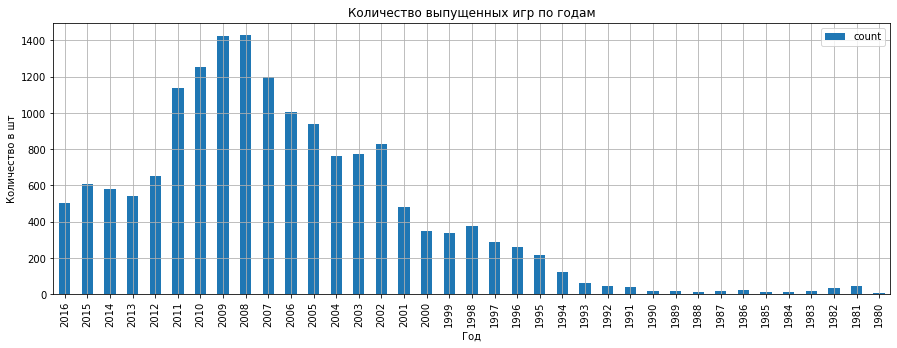

In [31]:
data_year_count.plot(y='count',kind = 'bar', grid=True, figsize=(15,5))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество в шт')

Мы видим, что по количеству до 1993 года выпускалось совсем мало игр. Более того, для рекламных кампаний необходимы действительно популярные игры и инновационные игры.

Наиболее популярными годами выпуска стали 2008 и 2009 годы. Однако после этого был спад вплоть до 2013 года. Учитывая горизонты планирования компаний и окупаемость рекламных кампаний период рассмотрения данных может быть в районе 3-5 лет: начиная с 2013 года, например, после которого есть тенденция к увеличению количества выпущенных игр.

### <a id='toc3_2_'></a>Продажи по платформам [&#8593;](#toc0_)

Сгруппируем данные по платформам найдем максимальные значения по количеству продаж:

In [32]:
data_platform_rating = data.pivot_table(index='platform',values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending =False)
data_platform_rating.head()

,total_sales
platform,
PS2,1233.559937
X360,961.239990
PS3,931.339966
Wii,891.179993
DS,802.780029


Длы выбранных 5 наиболее популярных игровых платформ построим графики распределения продаж игр по годам:

1. PS2:

Text(0, 0.5, 'Количество в млн.шт')

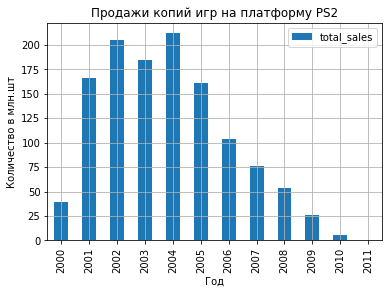

In [33]:
data.loc[data['platform'] == 'PS2'].pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(y='total_sales',kind = 'bar', grid=True)
plt.title('Продажи копий игр на платформу PS2')
plt.xlabel('Год')
plt.ylabel('Количество в млн.шт')

Видим, что пик пришелся на начало 2000-х. "Цикл жизни" приставки составляет примерно 7 лет. Пока наши предположения об интервале времения для прогноза на 2017 год подтверждаются.

2. X360:


Text(0, 0.5, 'Количество в млн.шт')

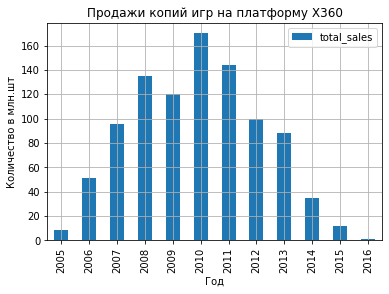

In [34]:
data.loc[data['platform'] == 'X360'].pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(y='total_sales',kind = 'bar', grid=True)
plt.title('Продажи копий игр на платформу X360')
plt.xlabel('Год')
plt.ylabel('Количество в млн.шт')

Распределение данной платформы *Х360* по продажам игр похоже на нормальное в период 12 лет от 2005 до 2016, однако большая часть продаж произошла так же в последние 10 лет от последнего 2016 года в представленных данных. Цикл жизни данной платформы 8 лет.

3. PS3:

Text(0, 0.5, 'Количество в млн.шт')

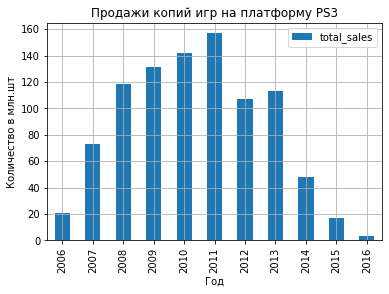

In [35]:
data.loc[data['platform'] == 'PS3'].pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(y='total_sales',kind = 'bar', grid=True)
plt.title('Продажи копий игр на платформу PS3')
plt.xlabel('Год')
plt.ylabel('Количество в млн.шт')

Ситуация почти аналогичная предыдущей с *Х360*. Платформы *PS3* и *Х360* появились почти в одно и то же время и их циклы жизни соответственно похожи и составляют 7-8 лет.

4. Wii:

Text(0, 0.5, 'Количество в млн.шт')

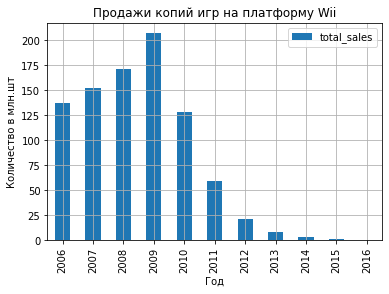

In [36]:
data.loc[data['platform'] == 'Wii'].pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(y='total_sales',kind = 'bar', grid=True)
plt.title('Продажи копий игр на платформу Wii')
plt.xlabel('Год')
plt.ylabel('Количество в млн.шт')

Здесь пик активности продаж пришелся на вторую половину 2000-х, но срок жизни чуть меньше, чем у *PS3* или *X360*, что объясняется их большей популярностью.

5. DS:

Text(0, 0.5, 'Количество в млн.шт')

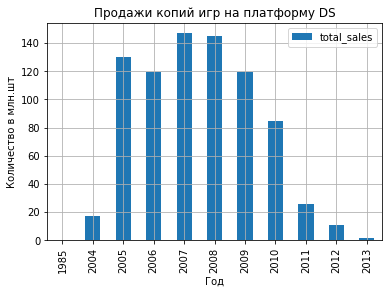

In [37]:
data.loc[data['platform'] == 'DS'].pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(y='total_sales',kind = 'bar', grid=True)
plt.title('Продажи копий игр на платформу DS')
plt.xlabel('Год')
plt.ylabel('Количество в млн.шт')

Цикл жизни платформы так же в диапазоне 6-8 лет, что подтверждает наше изначальное предположение. Почему-то на графике присутствует столбец с 1985 годом, но в то время данной консоли еще не существовало. Проверим, что за игры отнесли в даннй год:

In [38]:
data['name'].loc[(data['platform'] == 'DS')& (data['year_of_release'] == 1985)].count()

1

In [39]:
data['name'].loc[(data['platform'] == 'DS')& (data['year_of_release'] == 1985)]

15957    strongest tokyo university shogi ds
Name: name, dtype: object

Данная игра не имеет отношения к несуществовавшей тогда платформе, поэтому можем просто удалить данную строку:

In [40]:
data = data.drop(index=[15957]).reset_index(drop=True)

### <a id='toc3_3_'></a>Выбор среза данных для дальнейшего анализа [&#8593;](#toc0_)

На основе двух предыдущих пунктах можно сделать вывод для опредения необходимого "Актуального периода":

После спада выпуска игр 2008-2009 годов восстановление данного рынка начинается в 2013 году, в связи с чем стоит рассматривать именно этот период, который несет необходимые тенденции в том числе и на 2017 год. Более того, циклы жизней наиболее популярных платформ составляют 6-8 лет в среднем, что в совокупности с необходимостью окупить рекламные кампании (заложить на это можно 2-3 года) также говорят нам о том, что необходимый нам актуальный период составляет 4 года.

Далее будем рассматривать, соответственно, период с 2013 по 2016, учитывая,что данные за 2016 год у нас неполные.


### <a id='toc3_4_'></a>Платформы-лидеры по продажам [&#8593;](#toc0_)

Для начала выберем данные за определенный ранее период и построим сводную таблицу с разбиением по платформам и годам:

In [41]:
data_act_period = data.query('year_of_release >= 2013')

In [42]:
data_act_period.pivot_table(columns='platform', index='year_of_release', values='total_sales', aggfunc='sum', margins= True , margins_name='Sum')


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,Sum
year_of_release,,,,,,,,,,,,
2013,56.570000,1.54,12.380000,113.250000,25.990000,3.14,10.590000,8.59,21.650000,88.580002,18.960001,361.239990
2014,43.759998,NaN,13.280001,47.759998,100.000000,0.24,11.900000,3.75,22.030001,34.740002,54.070000,331.529999
2015,27.780001,NaN,8.520000,16.820000,118.900002,0.12,6.250000,1.14,16.350000,11.960000,60.139999,267.980011
2016,15.140000,NaN,5.250000,3.600000,69.250000,NaN,4.250000,0.18,4.600000,1.520000,26.150000,129.940002
Sum,143.250000,1.54,39.430000,181.429993,314.140015,3.50,32.989998,13.66,64.629997,136.800003,159.320007,1090.690063


Явно видно, что данные за 2016 год неполные. 

Нетрудно заметить, что наиболее популярной платформой является *PS4* в нашем актуальном периоде. Набирает популярность *XOne*. Эти 2 платформы и стоит отметить.

*PS3* и *X360* уже отживают свое время и из популярность падает заметно с каждым годом. То же самое происходит с *3DS*,*PC*
и *WiiU*. Остальные платформы вообще большого вклада в игровую индустрию внести не смогли. 

Построим график "ящик с усами"(диаграмма размаха) для платформ с разбивкой по каждой игре на количество проданных копий:

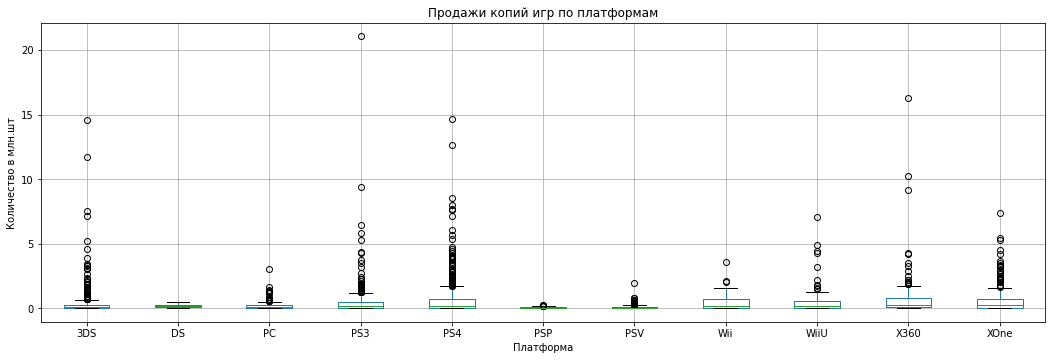

In [44]:
data_act_period.pivot_table(index='name',values='total_sales', columns='platform', aggfunc='sum').boxplot(figsize = (18,5.5))
plt.title('Продажи копий игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество в млн.шт')
plt.show()

Видим сильно выбивающиеся значения популярных игр. Для наглядности приблизим сами "ящики"( диапазон от Q1 до Q3).


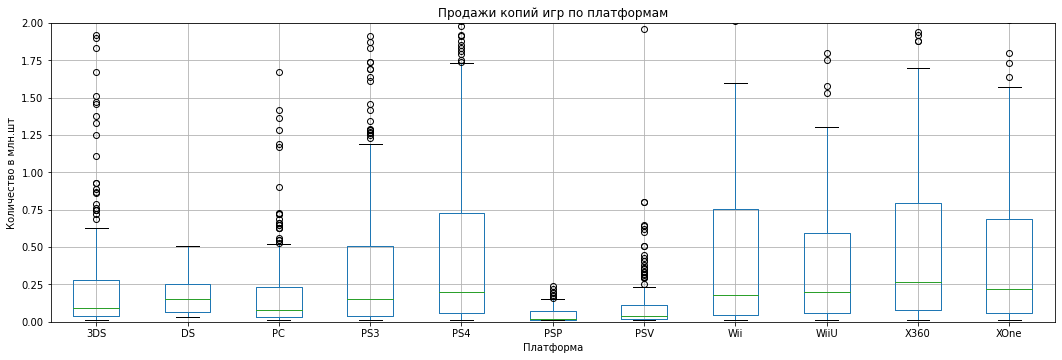

In [45]:
data_act_period.pivot_table(index='name',values='total_sales', columns='platform', aggfunc='sum').boxplot(figsize = (18,5.5))
plt.ylim(0, 2)
plt.title('Продажи копий игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество в млн.шт')
plt.show()

Видим, что *PS4*, *XOne* и пока еще *X360* обладают наибольшими продажами копий игр по миру. У них в том числе и наибольшие значения 3-го квартиля, что подтверждает наши наблюдения и предположения.

### <a id='toc3_5_'></a>Влияние отзывов пользователей и критиков на продажи игр в рамках самой популярной платформы PS4  [&#8593;](#toc0_)

Выберем соответствующие столбцы для платоформы *PS4* и построим диаграммы рассеяния.

In [46]:
data_PS4 = data_act_period.loc[data_act_period['platform'] == 'PS4']

In [47]:
data_PS4_users_con = data_PS4.loc[:,['user_score','total_sales']]
data_PS4_critics_con = data_PS4.loc[:,['critic_score','total_sales']]

Text(0, 0.5, 'Количество копий проданных игр в млн.шт')

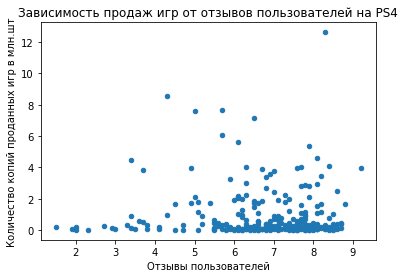

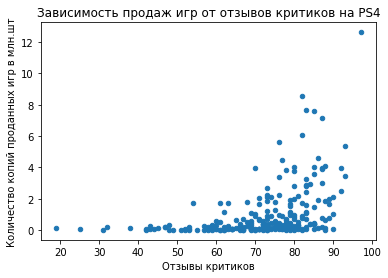

In [48]:
data_PS4_users_con.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж игр от отзывов пользователей на PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество копий проданных игр в млн.шт')

data_PS4_critics_con.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж игр от отзывов критиков на PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество копий проданных игр в млн.шт')

По графику с отзывами критиков прослеживается некая линейная взаимосвязь, но опредления зависимости необходимо посчитать корреляцию:


In [49]:
data_PS4.loc[:,['total_sales','user_score','critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


Да, между продажами и оценками критиков есть небольшая линейная прямая связь, однако скорее всего полагаться на данную корреляцию не стоит. Более того, линейной связи между отзывами покупателей и продажами нет вообще.

Необходимо провести те же исследования относительно второй по полуярности платформы *XOne* и сделать более точный вывод относительно данного предположения зависимости продаж от оценок критиков.

### <a id='toc3_6_'></a>Влияние отзывов пользователей и критиков на продажи игр на платформу XOne. Сравнение результатов  [&#8593;](#toc0_)

In [50]:
data_XOne = data_act_period.loc[data_act_period['platform'] == 'XOne']

Text(0, 0.5, 'Количество копий проданных игр в млн.шт')

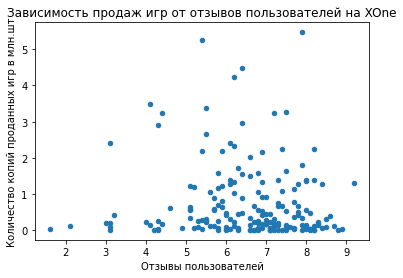

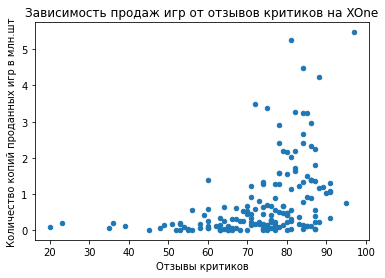

In [51]:
data_XOne.loc[:,['user_score','total_sales']].plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж игр от отзывов пользователей на XOne')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Количество копий проданных игр в млн.шт')

data_XOne.loc[:,['critic_score','total_sales']].plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Зависимость продаж игр от отзывов критиков на XOne')
plt.xlabel('Отзывы критиков')
plt.ylabel('Количество копий проданных игр в млн.шт')


In [52]:
data_XOne.loc[:,['total_sales','user_score','critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


Ситуация похожа на предыдущую, что так же говорит о слабой взаимосвязи между оценками критиков и продажами игр.

**Далее представлен анализ продаж относительно оценок на всех основных платформах:**


In [53]:
data_act_period['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Для платформы PS3 корреляция составляет: 
               critic_score  total_sales
critic_score      1.000000     0.334285
total_sales       0.334285     1.000000 

Для платформы PS3 корреляция составляет: 
              user_score  total_sales
user_score     1.000000     0.002394
total_sales    0.002394     1.000000 

Для платформы X360 корреляция составляет: 
               critic_score  total_sales
critic_score      1.000000     0.350345
total_sales       0.350345     1.000000 

Для платформы X360 корреляция составляет: 
              user_score  total_sales
user_score     1.000000    -0.011742
total_sales   -0.011742     1.000000 

Для платформы PS4 корреляция составляет: 
               critic_score  total_sales
critic_score      1.000000     0.406568
total_sales       0.406568     1.000000 

Для платформы PS4 корреляция составляет: 
              user_score  total_sales
user_score     1.000000    -0.031957
total_sales   -0.031957     1.000000 

Для платформы 3DS корреляция состав

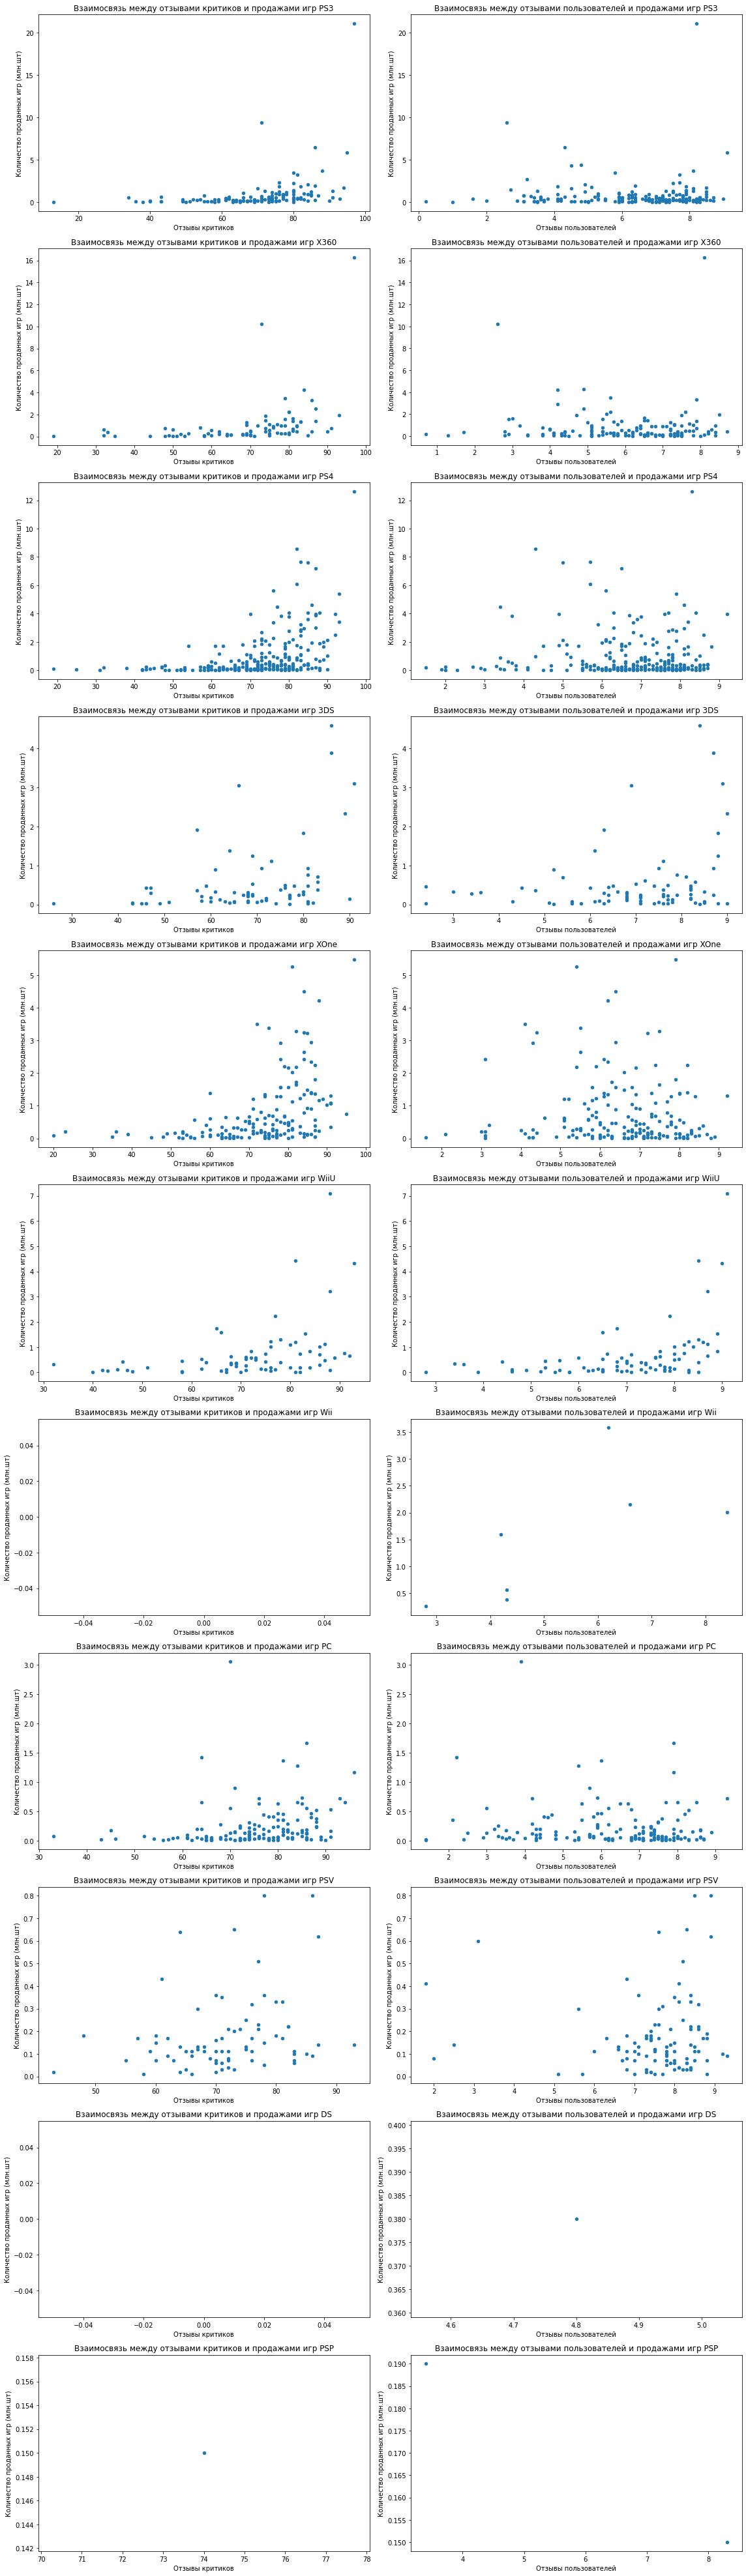

In [54]:
r = 11
c = 2

fig, axs = plt.subplots(r, c, figsize=(16, 5 * r))
scores = ['critic_score', 'user_score']
platf = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP']

for j in range(r):
    for i in range(c):
        data_platf = data_act_period.loc[data_act_period['platform'] == platf[j]]
        title_dict = {'critic_score': f'Взаимосвязь между отзывами критиков и продажами игр {platf[j]}',\
                      'user_score': f'Взаимосвязь между отзывами пользователей и продажами игр {platf[j]}'}
        xlabel_dict = {'critic_score': 'Отзывы критиков','user_score': 'Отзывы пользователей'}
        ax = axs[j, i]  
        data_platf.plot(x=scores[i], y='total_sales', kind='scatter', ax=ax, title=title_dict[scores[i]])\
        .set(xlabel=xlabel_dict[scores[i]], ylabel='Количество проданных игр (млн.шт)')
        print(f'Для платформы {platf[j]} корреляция составляет:','\n',data_platf.loc[:,[scores[i],'total_sales']].corr(),'\n')
plt.tight_layout()  # избегаем наложения графиков
plt.show()

Видим, что для некоторых старых платформ вообще нет информации об оценках критиков и пользователей (видимо не было такой задачи исходя из небольшого количества выпускаемых игр в то время).

По большинству относительно современных платформ мы можем наблюдать лишь слабую положительную корреляцию между оценками пользователей и критиков и кол-вом проданных игр, поэтому только в конкретных случаях, где корреляция будет большой (например, с платформой *Wii* c корреляцией 0,68 между оценками пользователей и кол-вом проданных копий игр), можно использовать эти факты для подкрепления исследования и принятия решений.

### <a id='toc3_7_'></a>Общее распределение игр по жанрам  [&#8593;](#toc0_)

Найдем жанр, где игры стабильно приносят высокий доход - для этого рассмотрим средние или медианные продажи.

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

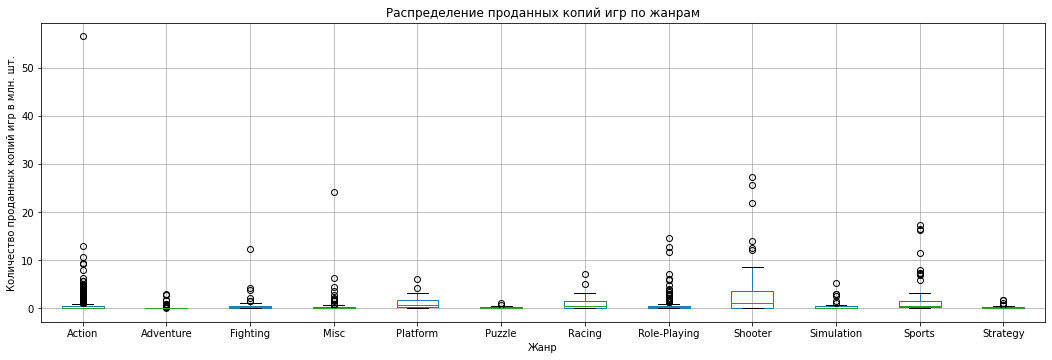

In [57]:
data_act_period.pivot_table(index='name',values='total_sales', columns='genre', aggfunc='sum').boxplot(figsize = (18,5.5))
plt.title('Раcпределение проданных копий игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Приблизим "ящик" для более точного анализа:

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

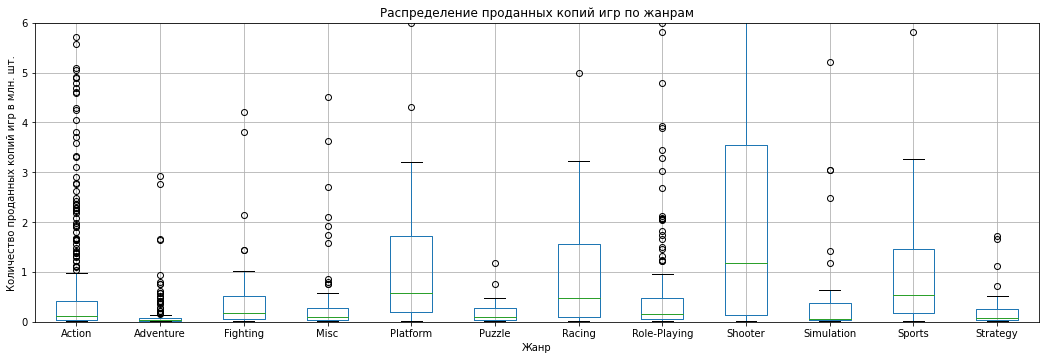

In [58]:
data_act_period.pivot_table(index='name',values='total_sales', columns='genre', aggfunc='sum').boxplot(figsize = (18,5.5))
plt.ylim(0,6)
plt.title('Раcпределение проданных копий игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Явно видно, что большие продажи игр жанра *Action* обусловлены точечными высокими продажами конкретных игр, хотя в среднем приносят не очень большой доход, как мы видим по медианному значению.

Самый стабильно прибыльный жанр - *Shooter*, в нем медианное значение самое высокое, а также размах ящика самый большой. Поэтому при планировании рекламных кампаний стоит учитывать этот жанр.

### <a id='toc3_8_'></a>Подытог исследовательского анализа [&#8593;](#toc0_)

1. Актуальный период исследования обозначен периодом в 2013-2016 гг.
2. Наиболее популярными платформами оказались *PS4* и *XOne*.
3. Среди жанров по популярности выделился *Action*, игр такого жанра выпустили больше всего. А по прибыльности - *Shooter*, являющийся самым стабильно продаваемым жанром

## <a id='toc4_'></a>Портрет пользователя каждого региона  [&#8593;](#toc0_)

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). 
2. Самые популярные жанры (топ-5). 
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### <a id='toc4_1_'></a>Самые популярные платформы для пользователей отдельных регионов [&#8593;](#toc0_)

Построим графики распредлений для топ-5 платформ для каждого региона:

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

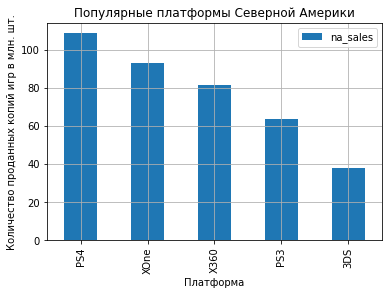

In [59]:
data_na_p = (
    data_act_period.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum')
    .sort_values(by='na_sales', ascending = False).head()
)
data_na_p.plot(kind = 'bar', grid=True)
plt.title('Популярные платформы Северной Америки')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

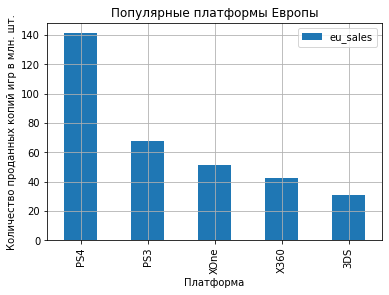

In [60]:
data_eu_p = (
    data_act_period.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum')
    .sort_values(by='eu_sales', ascending = False).head()
)
data_eu_p.plot(kind = 'bar', grid=True)
plt.title('Популярные платформы Европы')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

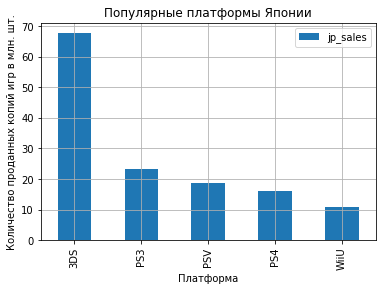

In [61]:
data_jp_p = (
    data_act_period.pivot_table(index='platform', values = 'jp_sales', aggfunc = 'sum')
    .sort_values(by='jp_sales', ascending = False).head()
)
data_jp_p.plot(kind = 'bar', grid=True)
plt.title('Популярные платформы Японии')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Получили такие результаты: 

1. В Северной Америке наиболее популярны платформы *PS4, XOne*.

2. В Европе большинство являются фанатами *PS*, причем популярнее конечно новая версия *PS4*.

3. В Японии преобладают портативные платформы, популярнее всех - *3DS*.

### <a id='toc4_2_'></a>Самые популярные жанры для пользователей отдельных регионов [&#8593;](#toc0_)

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

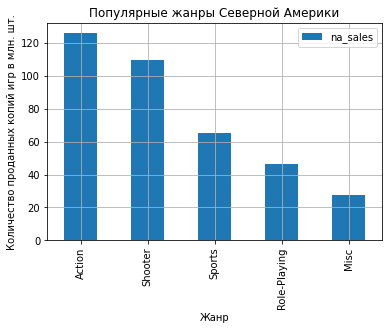

In [62]:
data_na_g = (
    data_act_period.pivot_table(index='genre', values = 'na_sales', aggfunc = 'sum')
    .sort_values(by='na_sales', ascending = False).head()
)
data_na_g.plot(kind = 'bar', grid=True)
plt.title('Популярные жанры Северной Америки')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

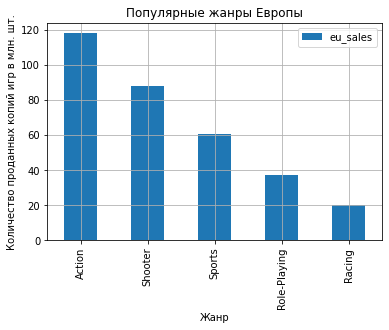

In [63]:
data_eu_g = (
    data_act_period.pivot_table(index='genre', values = 'eu_sales', aggfunc = 'sum')
    .sort_values(by='eu_sales', ascending = False).head()
)
data_eu_g.plot(kind = 'bar', grid=True)
plt.title('Популярные жанры Европы')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

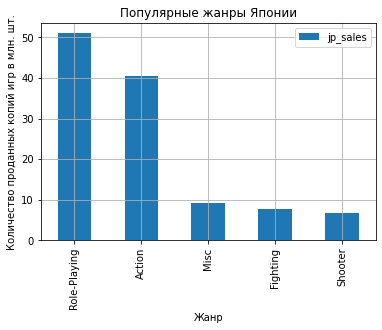

In [64]:
data_jp_g = (
    data_act_period.pivot_table(index='genre', values = 'jp_sales', aggfunc = 'sum')
    .sort_values(by='jp_sales', ascending = False).head()
)
data_jp_g.plot(kind = 'bar', grid=True)
plt.title('Популярные жанры Японии')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Вывод: 

В Северной Америке и Европе наиболее популярны жанры *Action и  Shooter*.

В Японии популярными жанрами являются *Role-Playing и Action*.

### <a id='toc4_3_'></a>Влияние рейтинга ESRB на продажи в отдельных регионах [&#8593;](#toc0_)

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

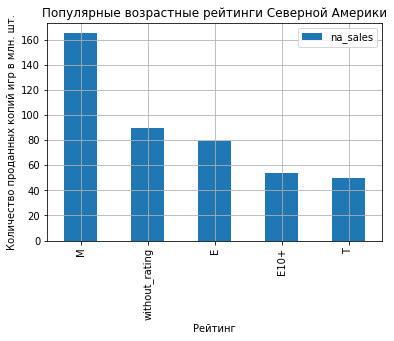

In [65]:
data_na_r = (
    data_act_period.pivot_table(index='rating', values = 'na_sales', aggfunc = 'sum')
    .sort_values(by='na_sales', ascending = False).head()
)
data_na_r.plot(kind = 'bar', grid=True)
plt.title('Популярные возрастные рейтинги Северной Америки')
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

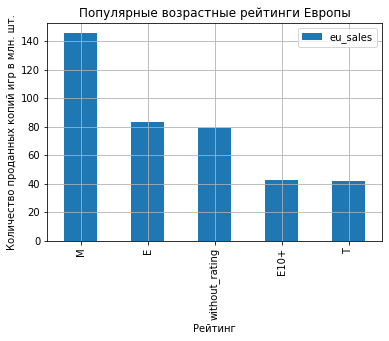

In [66]:
data_eu_r = (
    data_act_period.pivot_table(index='rating', values = 'eu_sales', aggfunc = 'sum')
    .sort_values(by='eu_sales', ascending = False).head()
)
data_eu_r.plot(kind = 'bar', grid=True)
plt.title('Популярные возрастные рейтинги Европы')
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Text(0, 0.5, 'Количество проданных копий игр в млн. шт.')

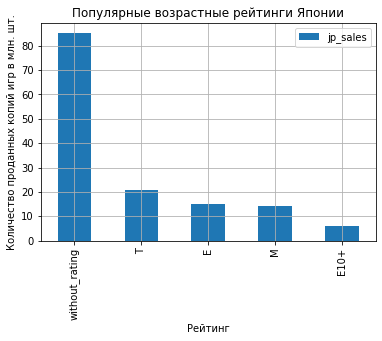

In [67]:
data_jp_r = (
    data_act_period.pivot_table(index='rating', values = 'jp_sales', aggfunc = 'sum')
    .sort_values(by='jp_sales', ascending = False).head()
)
data_jp_r.plot(kind = 'bar', grid=True)
plt.title('Популярные возрастные рейтинги Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданных копий игр в млн. шт.')

Вывод: 

В Северной Америке и Европе есть влияние рейтинга с ограничением по возрасту *М*.

В Японии такого влияния нет и преобладают игры без указания возрастного рейтинга.

## <a id='toc5_'></a>Проверка гипотез [&#8593;](#toc0_)

### <a id='toc5_1_'></a>Средние пользовательские рейтинги платформ XOne и PC [&#8593;](#toc0_)

Сформулируем гипотезы:

$H_0$ - Средние пользовательские рейтинги платформ XOne и PC равны.

$H_1$ - Средние пользовательские рейтинги платформ XOne и PC НЕ равны (отличаются).

Выберем соответствующие данные и проведем двусторонний t-тест о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (не зависящим друг от друга) - *st.ttest_ind*  с p-value=0.05 (обусловенным повышенной строгостью к данному рейтингу).

In [68]:
XOne_users_rat = data_act_period.loc[data_act_period['platform']=='XOne']['user_score']

In [69]:
PC_users_rat = data_act_period.loc[data_act_period['platform']=='PC']['user_score']

In [70]:
alpha = 0.05 # уровень значимости

results = st.ttest_ind(XOne_users_rat, PC_users_rat, alternative='two-sided',nan_policy='omit')# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14012686962472454
Нет оснований отвергнуть нулевую гипотезу


In [71]:
XOne_users_rat.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [72]:
PC_users_rat.describe()

count    155.000000
mean       6.269678
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Вывод: Так как у нас нет оснований отвергнуть нулевую гипотезу, то можно предположить, что все-таки средние пользовательские рейтинги платформ *XOne* и *PC* равны. 

Поменяв значение *alpha*, все равно не смогли бы отвергнуть нулевую гипотезу, так как значение *p-value* достаточно высоко

### <a id='toc5_2_'></a>Средние пользовательские рейтинги жанров Action и Sports [&#8593;](#toc0_)

Сформулируем гипотезы:

$H_0$ - Средние пользовательские рейтинги жанров Action и Sports равны.

$H_1$ - Средние пользовательские рейтинги платформ Action и Sports НЕ равны (разные).

Выберем соответствующие данные и проведем двусторонний t-тест о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (не зависящим друг от друга) - *st.ttest_ind*  с p-value=0.05 (обусловенным повышенной строгостью к данному рейтингу).

In [73]:
Action_users_rat = data_act_period.loc[data_act_period['genre']=='Action']['user_score']

In [74]:
Sports_users_rat = data_act_period.loc[data_act_period['genre']=='Sports']['user_score']

In [75]:
alpha = 0.05 # уровень значимости

results = st.ttest_ind(Action_users_rat, Sports_users_rat, alternative='two-sided',nan_policy='omit')# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    

p-value: 1.051835274279139e-27
Отвергаем нулевую гипотезу


In [76]:
Action_users_rat.describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [77]:
Sports_users_rat.describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Вывод: Так как мы отвергаем нулевую гипотезу о равенстве пользовательских рейтингов двух жанров *Action* и *Sports*, то у нас есть основания данные не противоречат альтернативной гипотезе: "пользовательские рейтинги двух жанров *Action* и *Sports*-разные".

Средние выборок вывожу выше, после проведения t-теста. По средним выборок получаем некое визуальное подтверждение правильного выполнения тестов Стьюдента и проверки гипотез соответственно.


## <a id='toc6_'></a>Общий вывод [&#8593;](#toc0_)

В ходе работы были проделаны следующие шаги, которые помогли сделать некоторые выводы, найти взаимосвязи и закономерности, а также сформулировать советы по размещению рекламных кампаний:

1. Подготовка данных: загрузка и изучение общей информации.

Мы загрузили данные и предварительно их изучили.

2. Предобработка данных: обработка пропущенных значений и дубликатов, корректировка типов данных, подсчет суммарных продаж по регионам

- Обработали пропущенные значения и дубликаты, которых не оказалось в данном датафрейме.
- Скорректировали типы данных, сократив тем самым вес датасета.
- Посчитали суммарные продажи копий игр по всем регионам.

3. Исследовательский анализ данных: анализ продаж по платформам, значимость отзывов в продажах
 
- Нашли актуальный для прогноза временной период: 2013-2016 гг.
- Исходя из актуального периода смогли найти самые популярные платформы, а именно: *XOne* и *PS4*. Важно отметить, что цикл жизни большинства популярных платформ составляет 6-8 лет.
- Изучили влияние оценок пользователей и критиков на продажи игр: это влияние крайне слабое и может быть использовано в качестве только второстепенного аргумента при поиске закономерностей или улучшении бизнес-показателей.
- Самыми популярным и прибыльным жанрами игр являются *Action* и *Shooter*, соответственно.

4. Портрет пользователя регионов
- В Северной Америке и Европе популярнее оказались платформы *PS* и стационарные платформы, а в Японии- *3DS* и портативные консоли.
- По жанрам распределение такое: в Европе и Северной Америке наиболее популярным жанром стал *Action*,а в Японии *Role-Playing*.
- Также по возрастным ограничениям в Северной Америке и Европе преобладают игры с ограничением "М"(доступно лицам старше 17 лет), а в Японии, соответственно, игры без возрастных ограничений.

5. Проверка гипотез
- Средние пользовательские рейтинги платформ XOne и PC могут быть с большой вероятностью равны.
- Данные говорят о том, что скорее всего средние пользовательские рейтинги платформ Action и Sports НЕ равны (разные).

**Общий совет разработчикам рекламных кампаний**: 
- Стоит обратить внимание на самые популярные платформы *XOne* и *PS4* в рамках Европы и Северной Америки, а также на портативные консоли новых поколений в Японии, и учитывая их жизненные циклы рекламная кампания не должна быть рассчитана более, чем на 2 года, с учетом окупаемости.
- Рекламные кампании не должны полагаться на оценки критиков или пользователей в общем. Если и брать их во внимание, то стоит проводить исследование в рамках каждого отдельно взятого жанра в совокупности с платформой.
- В Европе и Северной Америке стоит сделать акцент на играх с возрастным ограничением "М". В Японии же можно остановится на играх общего доступа, которые могут быть запущены на портативной консоли.
